In [18]:
import import_ipynb
from main import *
from main import classification

In [19]:
# instanciate the model
lr = LogisticRegression()

In [20]:
# fitting and score
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.808

In [21]:
# score on the predict
lr.score(X_test, y_test)

0.8193333333333334

In [22]:
# using gridsearch for the best score
prams = {'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter':[20, 50, 100, 200], 'fit_intercept':[True, False]}
grid = GridSearchCV(LogisticRegression(), param_grid=prams, cv=5, scoring='accuracy')

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [20, 50, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [24]:
# best estimator
grid.best_estimator_

LogisticRegression(max_iter=50)

In [25]:
# using best estimator for the model
best_lr = grid.best_estimator_

In [26]:
# fitting 
best_lr.fit(X_train, y_train)
best_lr.score(X_train, y_train)

0.808

In [27]:
best_lr.score(X_test, y_test)

0.8193333333333334

In [28]:
# predicted target
y_pred = best_lr.predict(X_test)

In [29]:
# evaluating 
confusion_matrix(y_test, y_pred)

array([[4606,   97],
       [ 987,  310]])

In [30]:
metric(y_test, y_pred)

confusion matrix

[[4606   97]
 [ 987  310]]
----------------------------------------------------
Errors
 MSE= 0.181
 RMSE= 0.425
----------------------------------------------------
Accuracy Score= 0.8193333333333334

----------------------------------------------------
classification report

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4703
           1       0.76      0.24      0.36      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.61      0.63      6000
weighted avg       0.81      0.82      0.78      6000

----------------------------------------------------


roc curve


False Positive= [0.         0.02062513 1.        ] 
 True Positive= [0.         0.23901311 1.        ] 
 Tresholds= [2 1 0] 







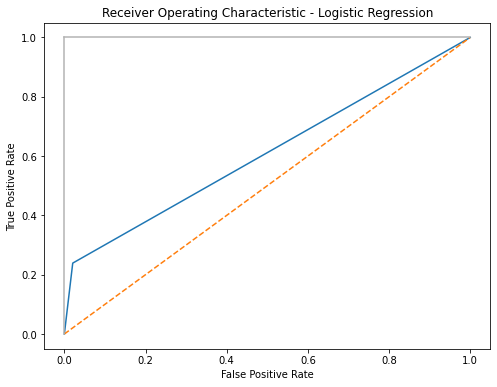

In [31]:
print("roc curve")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('\n')
print(f'False Positive= {fpr} \n True Positive= {tpr} \n Tresholds= {thresholds} \n')
print('\n')
print('\n')
# Ploting ROC curves
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("img/logreg.png")
plt.show()